In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [2]:
def gallery(array, ncols=10):
    nindex, height, width, channels = array.shape
    nrows = nindex // ncols
    result = (array.reshape(nrows, ncols, height, width, channels)
              .swapaxes(1, 2)
              .reshape(height * nrows, width * ncols, channels))
    return result


def make_array(fnames):
    return np.asarray([np.asarray(Image.open(fname).convert('RGB')) for fname in fnames])

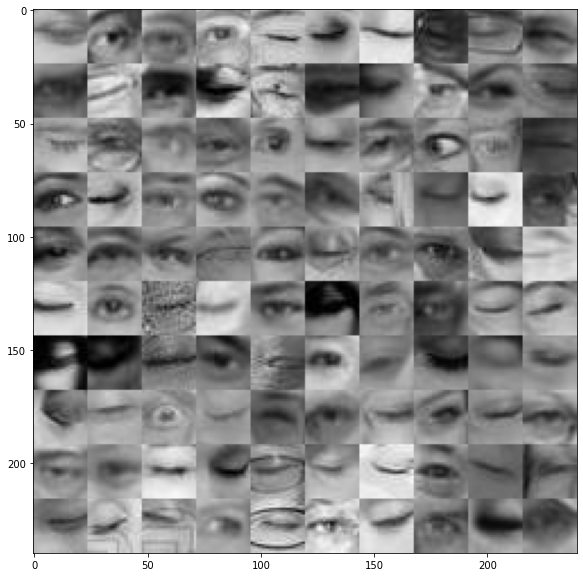

In [39]:
data_folder = '/home/dima/datasets/eyes/train/'
fnames = sorted(glob.glob(os.path.join(data_folder, '*.jpg')))
array = make_array(fnames[900:1000])
result = gallery(array)
plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.show()

In [41]:
opened_grouped = [
    [0,1,2,4,8,16,17,18,20,21,22,24,30,37,38,39,41,43,46,50,51,54,59,60,61,62,63,64,69,72,80,81,83,84,85,90,93,94,96,97,98,],
    [0,1,3,5,7,8,14,18,19,20,21,22,28,31,34,35,36,37,38,39,44,47,48,49,52,53,55,58,59,64,65,67,71,73,74,78,84,85,87,88,90,91,93,98,99],
    [1,3,4,6,8,10,13,15,18,19,23,24,29,34,36,37,39,41,45,47,48,51,54,55,56,57,59,61,62,63,64,66,67,69,77,78,79,82,87,88,90,92,96],
    [0,1,3,5,7,8,10,11,12,14,16,18,20,22,26,27,28,33,37,38,39,41,43,44,45,47,48,50,51,52,53,54,56,59,60,62,63,64,67,68,69,71,74,75,80,82,86,87,91,92,94,95,98],
    [1,2,8,9,10,11,13,16,18,21,25,27,28,30,31,32,34,35,36,40,42,43,44,45,46,47,51,53,55,56,57,61,63,64,68,69,70,71,72,74,76,80,83,85,87,88,90,93,97],
    [1,2,4,5,7,12,14,20,26,27,29,33,34,39,40,45,46,52,53,55,56,57,59,60,63,65,67,69,70,71,72,73,74,75,77,78,79,81,84,85,88,90,91,93,95,98,99],
    [0,1,2,3,4,5,6,7,8,9,10,13,14,17,19,20,21,23,24,26,28,32,33,35,37,38,39,40,45,46,47,48,50,52,53,56,57,59,63,64,66,69,70,71,76,77,78,79,81,83,86,87,91,92,93],
    [1,2,4,5,6,8,10,11,16,18,23,24,25,27,30,34,35,36,43,45,47,48,50,55,56,57,58,60,62,63,65,66,68,71,74,76,78,82,85,88,90,91,95,96,97,98,99],
    [0,1,3,7,8,9,15,17,19,22,23,24,25,26,27,30,32,33,34,35,36,37,38,39,40,42,46,47,50,51,52,54,55,57,58,59,60,62,68,69,70,71,72,73,75,77,81,83,84,92,93,94,95,96,98],
    [1,2,3,10,12,17,18,21,22,23,24,26,27,28,30,32,33,34,35,39,40,41,42,44,46,47,51,54,56,57,63,65,72,75,77,79,80,81,87,93,95,97],
]
opened = [item + i * 100 for i, group in enumerate(opened_grouped) for item in group]
n_imgs = 100 * len(opened_grouped)
labels = np.zeros(n_imgs, dtype=int)
labels[opened] = 1
df = pd.DataFrame({'filename': fnames[:n_imgs], 'label': labels})
df.to_csv(data_folder + 'labels.csv', index=False)

In [42]:
df

,filename,label
0,/home/dima/datasets/eyes/train/000000.jpg,1
1,/home/dima/datasets/eyes/train/000001.jpg,1
2,/home/dima/datasets/eyes/train/000002.jpg,1
3,/home/dima/datasets/eyes/train/000003.jpg,0
4,/home/dima/datasets/eyes/train/000004.jpg,1
...,...,...
995,/home/dima/datasets/eyes/train/000995.jpg,1
996,/home/dima/datasets/eyes/train/000996.jpg,0
997,/home/dima/datasets/eyes/train/000997.jpg,1
998,/home/dima/datasets/eyes/train/000998.jpg,0
